In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\prksh\Downloads\adease_data\train_1.csv")
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Out the Null values

In [4]:
print(df.isna().sum())
null_counts = df.isna().sum().reset_index().drop(0)
null_counts.columns = ['Date', 'null_counts']


Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [5]:
null_counts.set_index('Date', inplace=True)

Text(0, 0.5, 'No. of null values')

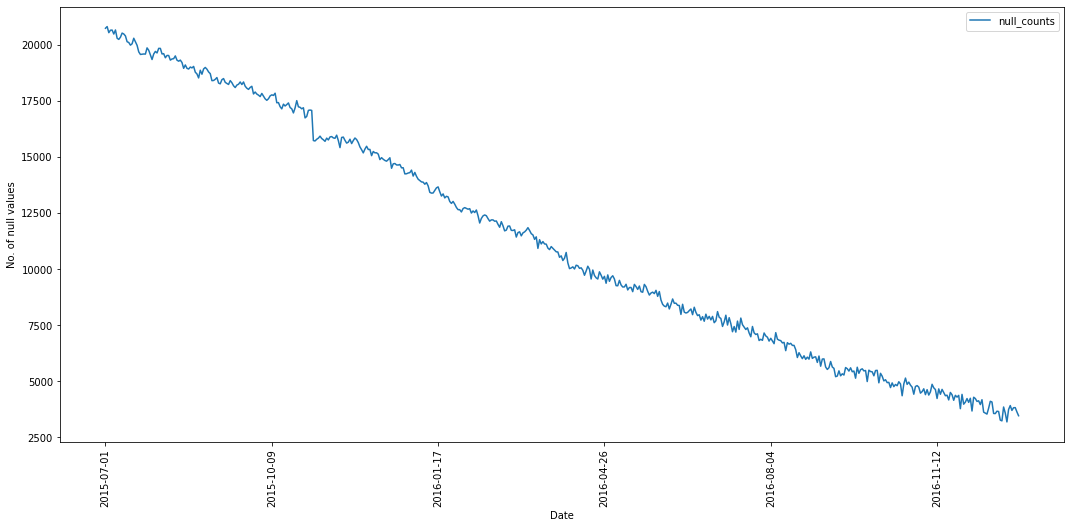

In [6]:

null_counts.plot(figsize=(18,8));
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("No. of null values")

It is clear from the plot that the null values decreases by the date, this may be due the fact that a lot of pages were released/launched after a certain date. This may not need treatment as this indicates the actual situation with the data and business rather than an anamoly. And as we will be aggregating the data based on languages the null values would be not be considered.

## EDA

Preprocesing

In [7]:
import re

strings = df['Page'].to_list()

# language flag extraction
regex = r'_(\w{2})\.wikipedia\.or'

language_flags = []
for string in strings:
    match = re.search(regex, string)
    if match:
        language_flags.append(match.group(1))
    else:
        language_flags.append("others")

print(f'Labelled Results\tTotal articles\n{len(language_flags)}\t\t\t{len(strings)}')
print(f'{np.unique(language_flags, return_counts=True)[0]}\n{np.unique(language_flags, return_counts=True)[1]}')

Labelled Results	Total articles
145063			145063
['de' 'en' 'es' 'fr' 'ja' 'others' 'ru' 'zh']
[18547 24108 14069 17802 20431 17855 15022 17229]


In [8]:
df['lang_flags'] = language_flags
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang_flags
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es


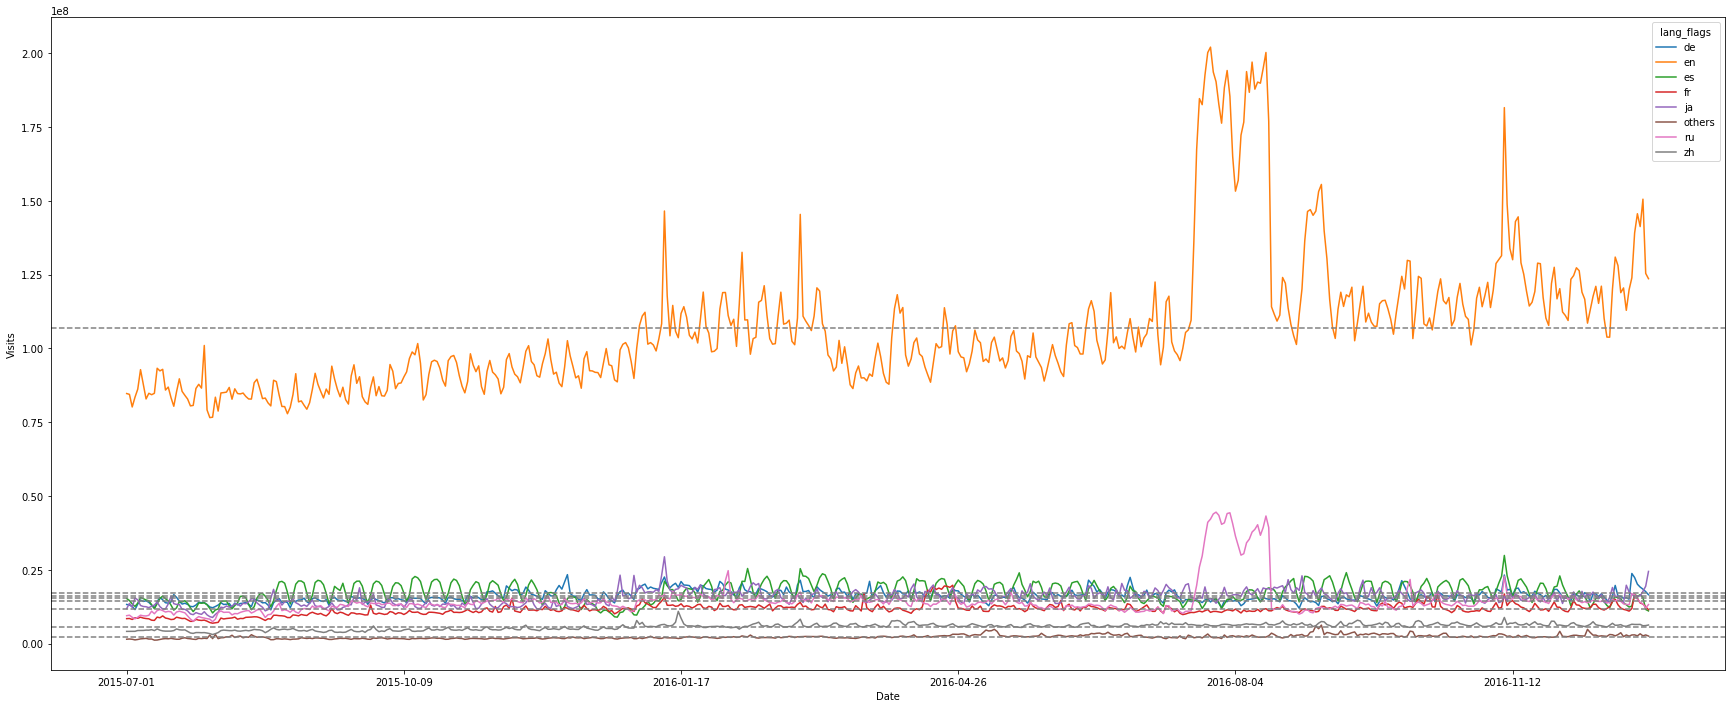

In [10]:
l_df_sum = df.groupby('lang_flags').sum().T
l_df_sum.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_sum.columns:
    plt.axhline(l_df_sum[i].mean(), color='grey', linestyle='--')

English beats other languages by a huge margin of total visits

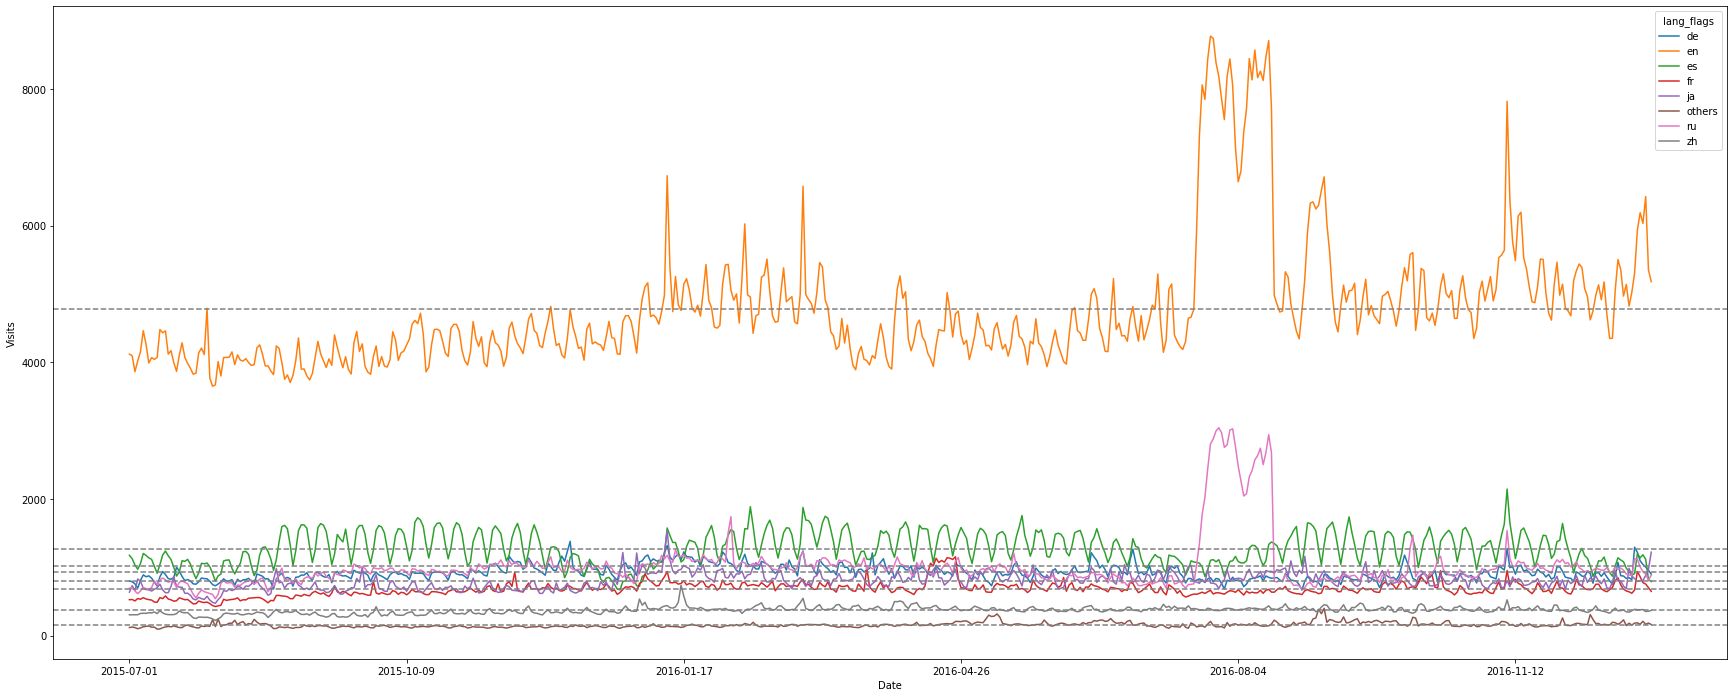

In [11]:
l_df_avg = df.groupby('lang_flags').mean().T
l_df_avg.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_avg.columns:
    plt.axhline(l_df_avg[i].mean(), color='grey', linestyle='--')

A similar observation is seen here as well, the english language beats the other languages by a high margin of average visits.

#### Overall

Text(0, 0.5, 'Visits')

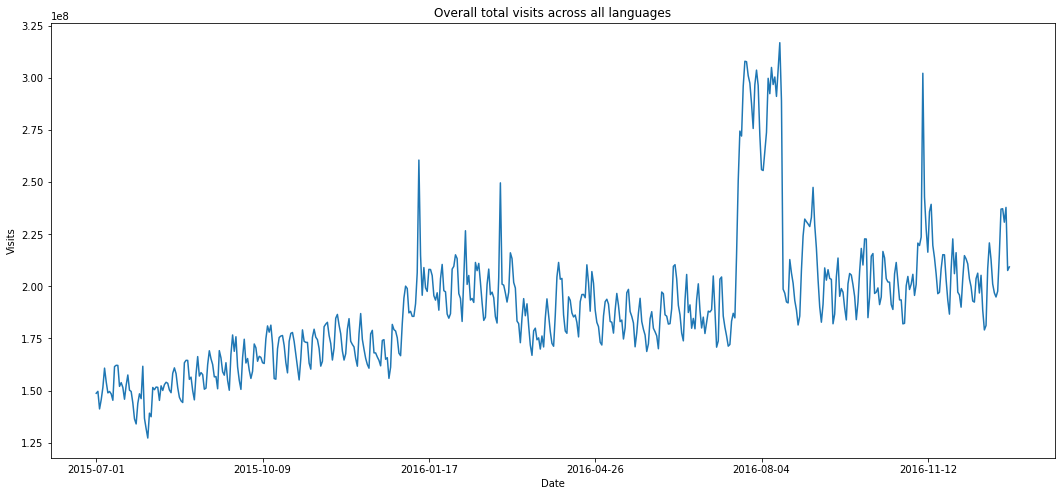

In [14]:
l_df_sum.sum(axis=1).plot(figsize=(18,8))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')

In [15]:
l_df_sum['Exog'] = pd.read_csv('https://raw.githubusercontent.com/atomikkus/time_series/main/Exog_Campaign_eng')['Exog'].to_list()

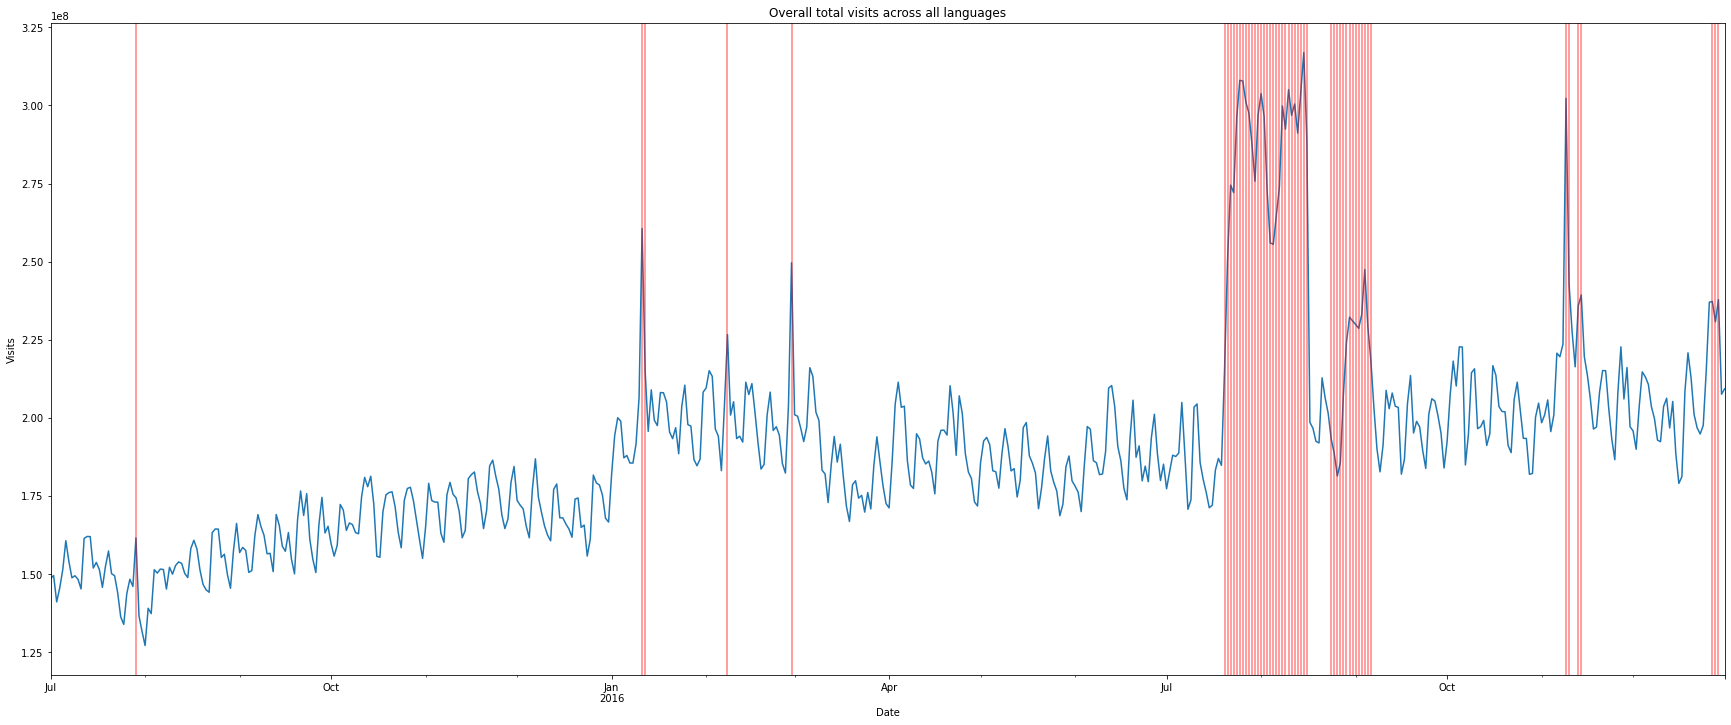

In [16]:
import matplotlib.pyplot as plt

l_df_sum.index = pd.to_datetime(l_df_sum.index)

# Sum the values across all columns
l_df_sum.sum(axis=1).plot(figsize=(30, 12))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')
for i in l_df_sum.index:
    if l_df_sum.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r', alpha=0.5)

plt.show()

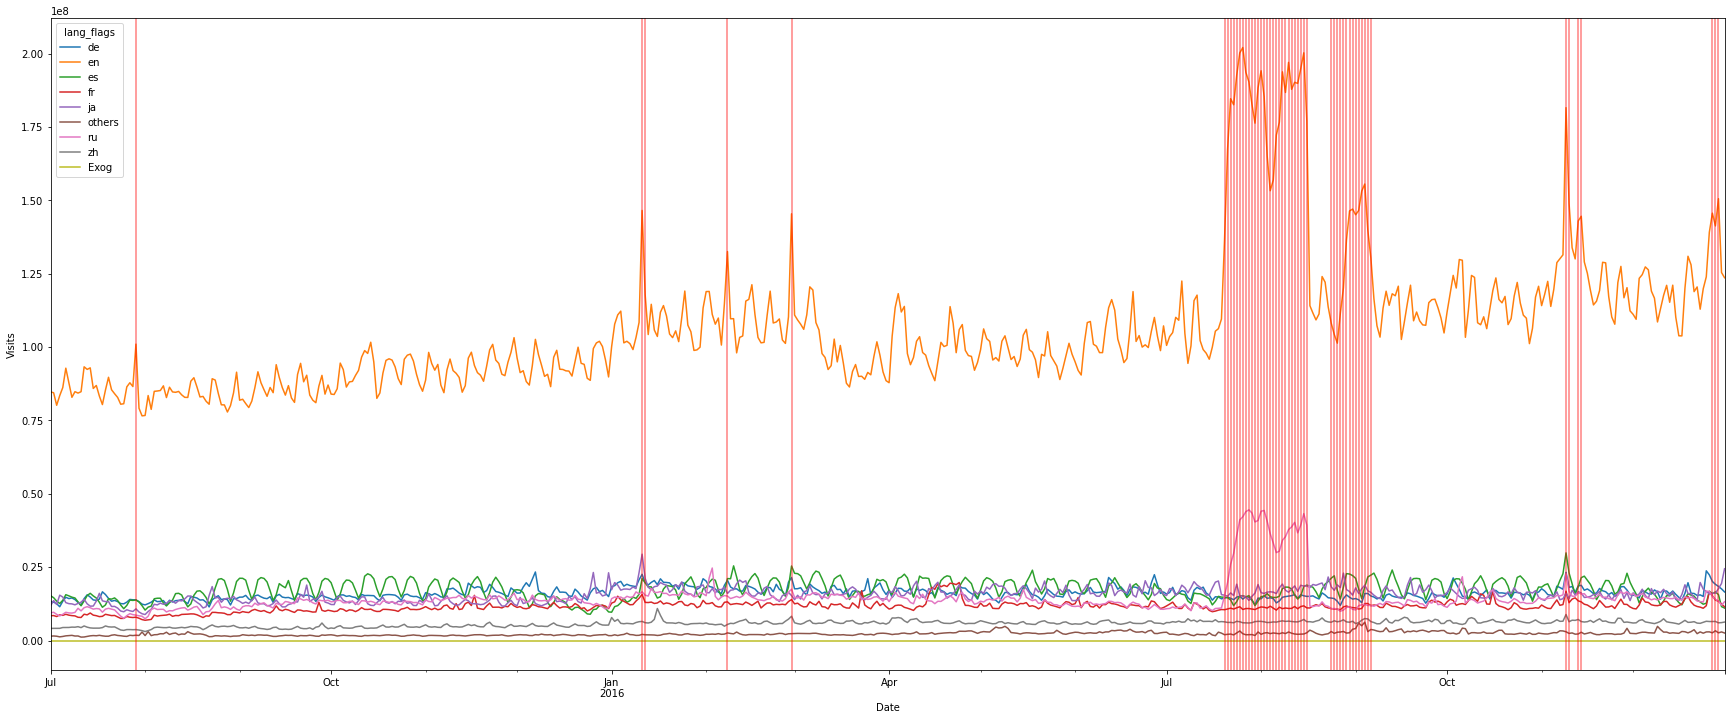

In [17]:
l_df_sum.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_sum.index:
    if l_df_sum.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r', alpha=0.5)

plt.show()

## Stationarity, decomposition, detrending, ACF, and PACF

In [18]:
## Stationarity Tests
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())  # Drop NA values for the test
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }



results = []

for column in l_df_sum.columns:
    if column != 'Exog':
        result = test_stationarity(l_df_sum[column])
        result['Column'] = column
        results.append(result)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Reorder columns for better readability
results_df = results_df[['Column', 'ADF Statistic', 'p-value', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']]
results_df

,Column,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,de,-2.402707,0.140974,-3.442678,-2.866978,-2.569666
1,en,-2.247284,0.189534,-3.442632,-2.866957,-2.569655
2,es,-3.014209,0.033589,-3.442655,-2.866968,-2.569661
3,fr,-2.849875,0.051495,-3.442609,-2.866947,-2.569650
4,ja,-2.555394,0.102571,-3.442495,-2.866897,-2.569623
5,others,-3.269594,0.016294,-3.442473,-2.866887,-2.569618
6,ru,-3.924031,0.001865,-3.442384,-2.866848,-2.569597
7,zh,-1.668433,0.447446,-3.442749,-2.867009,-2.569683


Let's interpret each row:

- **de**:
  - **ADF Statistic**: -2.402707
  - **p-value**: 0.140974
  - **Critical Values**: -3.442678 (1%), -2.866978 (5%), -2.569666 (10%)
  - **Interpretation**: The p-value is greater than 0.05, and the ADF Statistic is not less than any of the critical values. Hence, we fail to reject the null hypothesis. The 'de' series is likely non-stationary.

- **en**:
  - **ADF Statistic**: -2.247284
  - **p-value**: 0.189534
  - **Critical Values**: -3.442632 (1%), -2.866957 (5%), -2.569655 (10%)
  - **Interpretation**: Similar to 'de', the p-value is greater than 0.05, and the ADF Statistic is not less than any of the critical values. The 'en' series is likely non-stationary.

- **es**:
  - **ADF Statistic**: -3.014209
  - **p-value**: 0.033589
  - **Critical Values**: -3.442655 (1%), -2.866968 (5%), -2.569661 (10%)
  - **Interpretation**: The p-value is less than 0.05, and the ADF Statistic is less than the 5% and 10% critical values. This suggests rejecting the null hypothesis. The 'es' series is likely stationary.

- **fr**:
  - **ADF Statistic**: -2.849875
  - **p-value**: 0.051495
  - **Critical Values**: -3.442609 (1%), -2.866947 (5%), -2.569650 (10%)
  - **Interpretation**: The p-value is slightly greater than 0.05, and the ADF Statistic is not less than any critical values. Hence, we are on the borderline but likely fail to reject the null hypothesis. The 'fr' series is likely non-stationary.

- **ja**:
  - **ADF Statistic**: -2.555394
  - **p-value**: 0.102571
  - **Critical Values**: -3.442495 (1%), -2.866897 (5%), -2.569623 (10%)
  - **Interpretation**: The p-value is greater than 0.05, and the ADF Statistic is not less than any critical values. The 'ja' series is likely non-stationary.

- **others**:
  - **ADF Statistic**: -3.269594
  - **p-value**: 0.016294
  - **Critical Values**: -3.442473 (1%), -2.866887 (5%), -2.569618 (10%)
  - **Interpretation**: The p-value is less than 0.05, and the ADF Statistic is less than the 5% and 10% critical values. This suggests rejecting the null hypothesis. The 'others' series is likely stationary.

- **ru**:
  - **ADF Statistic**: -3.924031
  - **p-value**: 0.001865
  - **Critical Values**: -3.442384 (1%), -2.866848 (5%), -2.569597 (10%)
  - **Interpretation**: The p-value is much less than 0.05, and the ADF Statistic is less than all critical values. This strongly suggests rejecting the null hypothesis. The 'ru' series is stationary.

- **zh**:
  - **ADF Statistic**: -1.668433
  - **p-value**: 0.447446
  - **Critical Values**: -3.442749 (1%), -2.867009 (5%), -2.569683 (10%)
  - **Interpretation**: The p-value is much greater than 0.05, and the ADF Statistic is not less than any critical values. The 'zh' series is likely non-stationary.

### Summary
- Stationary: 'es', 'others', 'ru'
- Non-stationary: 'de', 'en', 'fr', 'ja', 'zh'


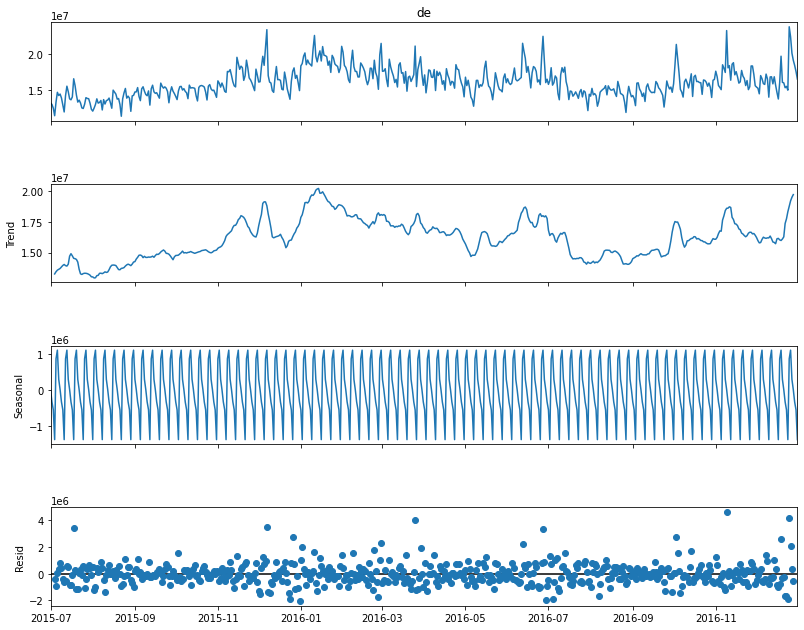

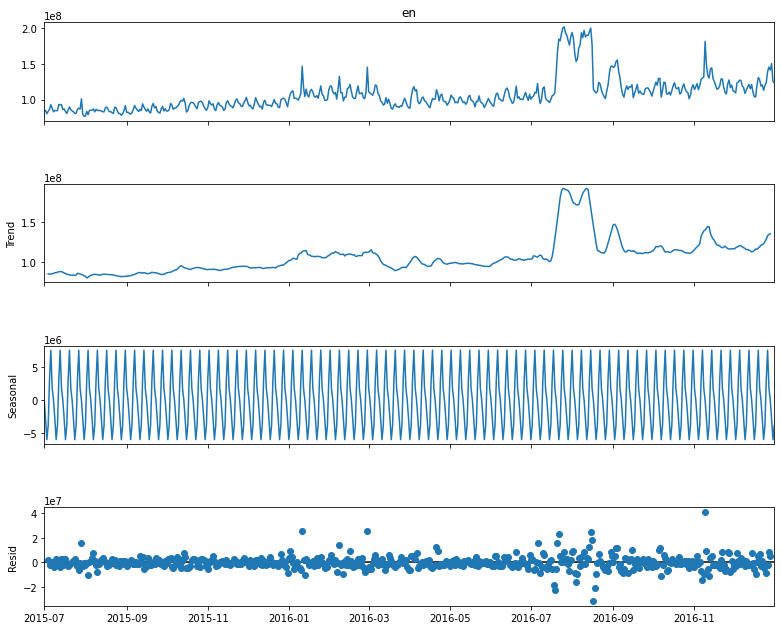

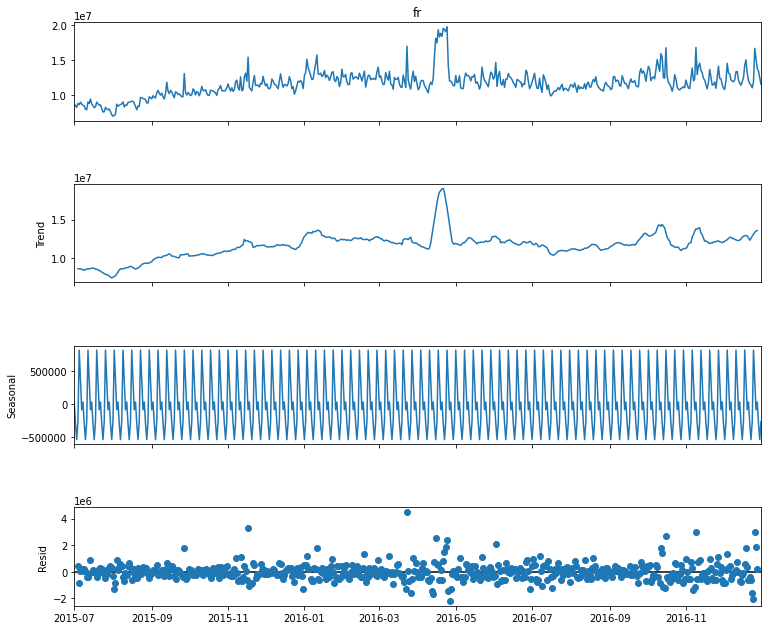

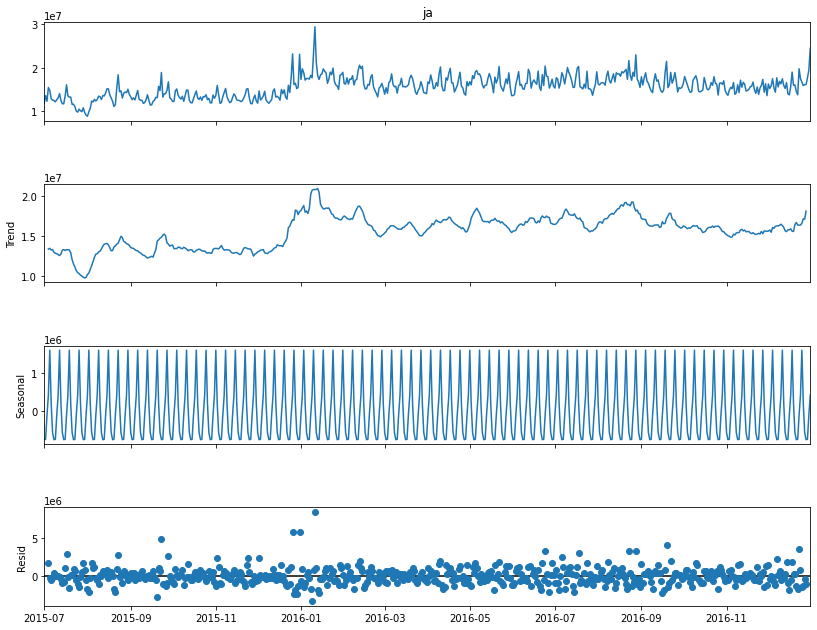

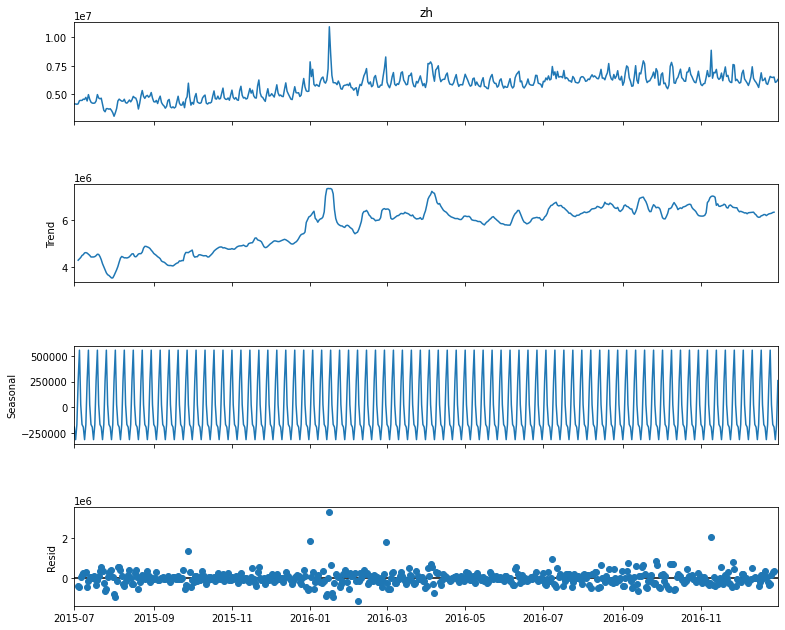

In [21]:
for i in ['de', 'en', 'fr', 'ja', 'zh']:
    decomposition = sm.tsa.seasonal_decompose(l_df_sum[i], model='additive')
    fig = decomposition.plot()
    fig.set_size_inches(12, 10) 



ACF and PACF for de


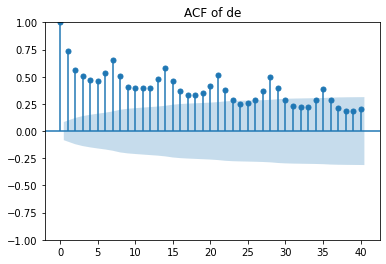

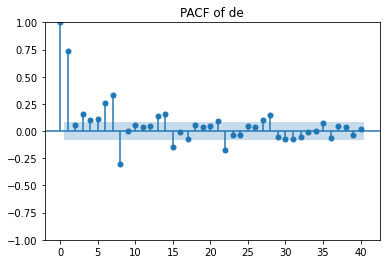

ACF and PACF for en


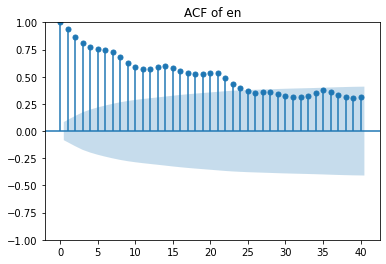

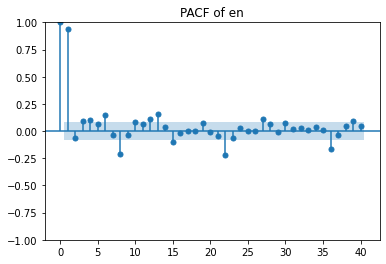

ACF and PACF for es


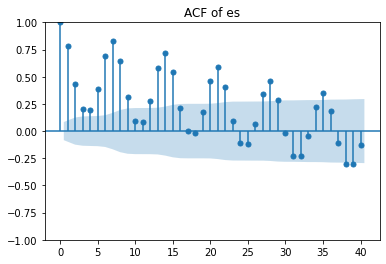

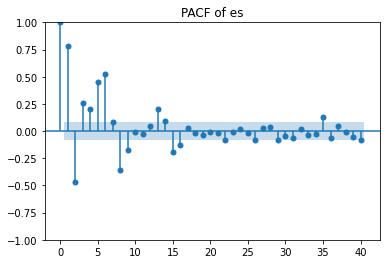

ACF and PACF for fr


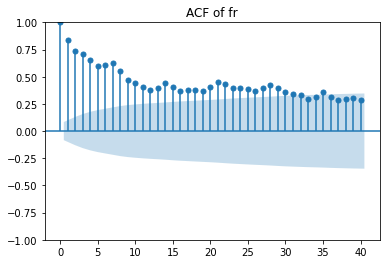

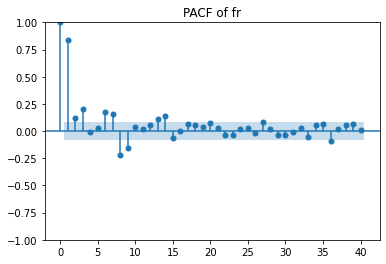

ACF and PACF for ja


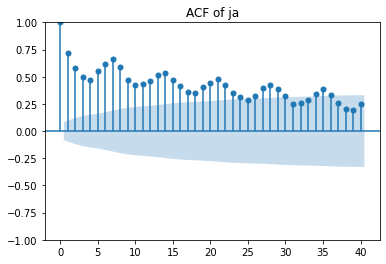

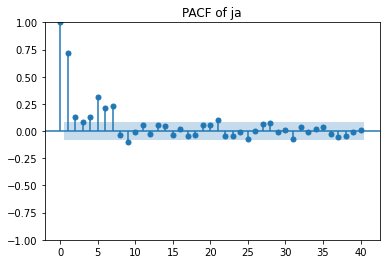

ACF and PACF for others


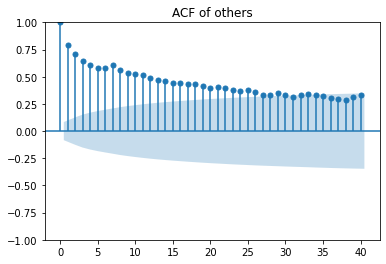

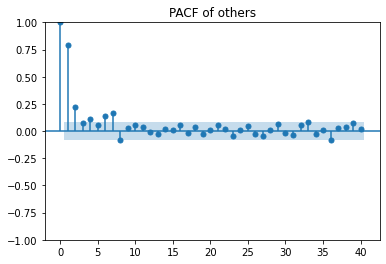

ACF and PACF for ru


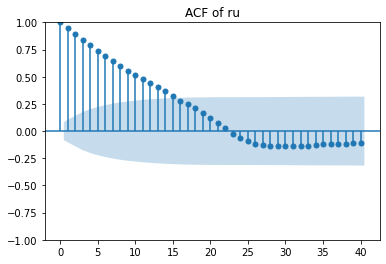

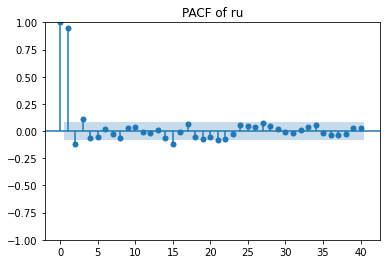

ACF and PACF for zh


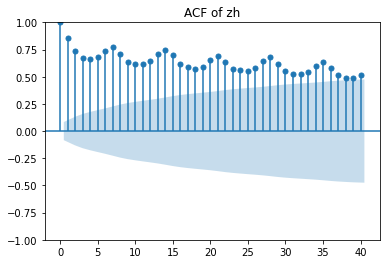

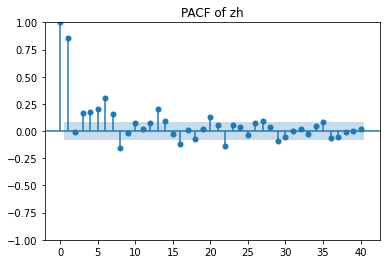

ACF and PACF for Exog


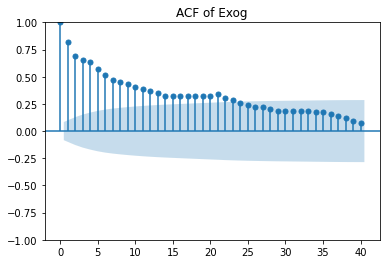

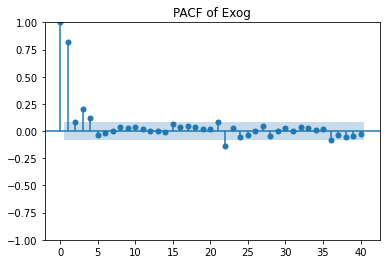

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for original time series
for column in l_df_sum.columns:
    print(f"ACF and PACF for {column}")
    plot_acf(l_df_sum[column].dropna(), lags=40)
    plt.title(f'ACF of {column}')
    plt.show()

    plot_pacf(l_df_sum[column].dropna(), lags=40)
    plt.title(f'PACF of {column}')
    plt.show()

# # ACF plot for de-trended & de-seasoned time series
# for column in ['language1', 'language2', 'language3', 'language4']:
#     print(f"ACF for de-trended & de-seasoned {column}")
#     plot_acf(df[f'{column}_differenced'].dropna(), lags=40)
#     plt.title(f'ACF of Differenced {column}')
#     plt.show()


In [33]:
# Function to perform differencing
def differencing(timeseries, lag=15):
    return timeseries.diff(periods=lag).dropna()


test_df = l_df_sum.copy()
# Apply differencing and test stationarity
results = []

for column in ['de', 'en', 'fr', 'ja', 'zh']:
    if column != 'Exog':
        differenced_series = differencing(test_df[column])
        result = test_stationarity(differenced_series)
        result['Language'] = column
        results.append(result)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Reorder columns for better readability
results_df = results_df[['Language', 'ADF Statistic', 'p-value', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']]
results_df

,Language,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,de,-5.335964,4.610532e-06,-3.443062,-2.867147,-2.569756
1,en,-4.441861,2.500917e-04,-3.443013,-2.867125,-2.569745
2,fr,-5.338662,4.551269e-06,-3.443112,-2.867168,-2.569768
3,ja,-5.240660,7.258263e-06,-3.443112,-2.867168,-2.569768
4,zh,-6.087340,1.056621e-07,-3.443112,-2.867168,-2.569768
